In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cs = pd.read_csv("Customers.csv")
ts = pd.read_csv("Transactions.csv")


In [3]:
# Merge datasets for feature generation
transactions_agg = ts.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'Quantity': 'sum',  # Total quantity purchased
    'TransactionID': 'count'  # Number of transactions
}).reset_index()

In [5]:
# Merge with customer data
customer_data = cs.merge(transactions_agg, on='CustomerID', how='left').fillna(0)


In [6]:
# Feature Selection
features = customer_data[['TotalValue', 'Quantity', 'TransactionID']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

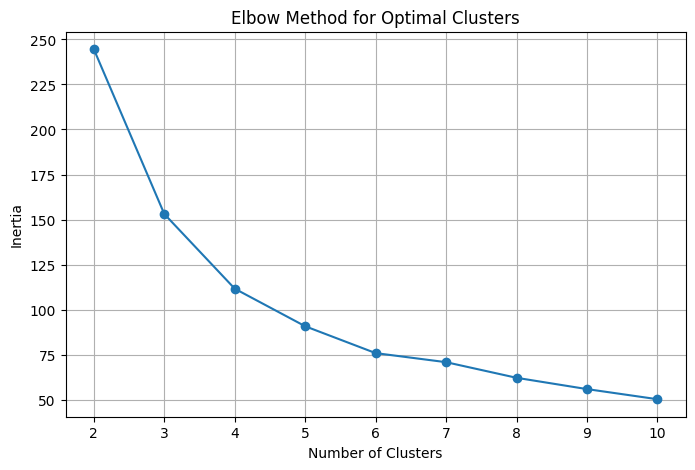

In [7]:
# Finding Optimal Clusters using Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [8]:
# Apply K-Means Clustering
optimal_clusters = 4  # Assume optimal clusters determined by Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)
customer_data['Cluster'] = kmeans.labels_

In [9]:
# Evaluate Clustering
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 0.8052437830269734
Silhouette Score: 0.39004223332536625


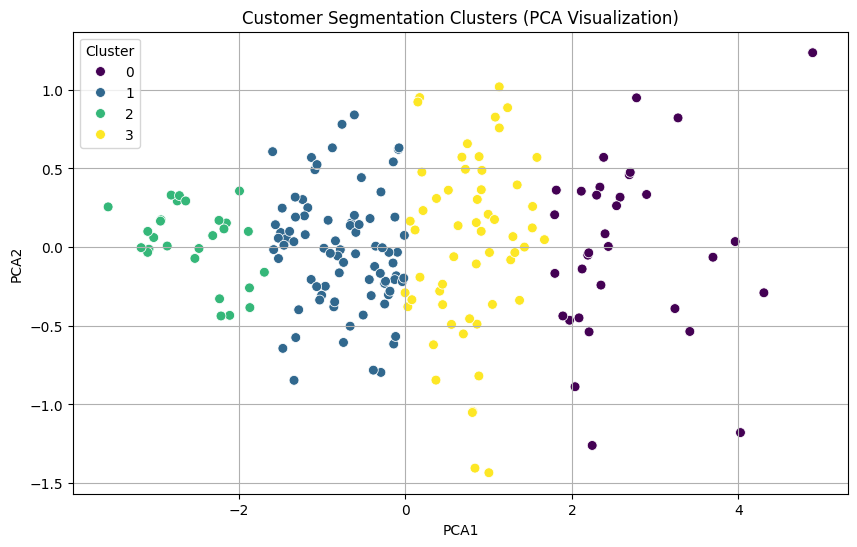

In [11]:
# Visualize Clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
customer_data['PCA1'] = pca_features[:, 0]
customer_data['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=50
)
plt.title('Customer Segmentation Clusters (PCA Visualization)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid()
plt.show()



In [13]:
# Save Results
customer_data[['CustomerID', 'Cluster']].to_csv('Dhanesh_Gore_Clusters.csv', index=False)
